# Visualisations

Here are the statistical graphics of Student Performence Factors.

### Importing the libraries

Importing pandas, seaborn and matplotlib for working with data visualizations.
Reading the dataset from csv.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

plt.style.use('ggplot')

df = pd.read_csv("data/StudentPerformanceFactors.csv")
df.shape

(6607, 20)

## Pie charts

A pie chart helps organize and show data as a percentage of a whole.

Here are pie charts for each categorical feature:

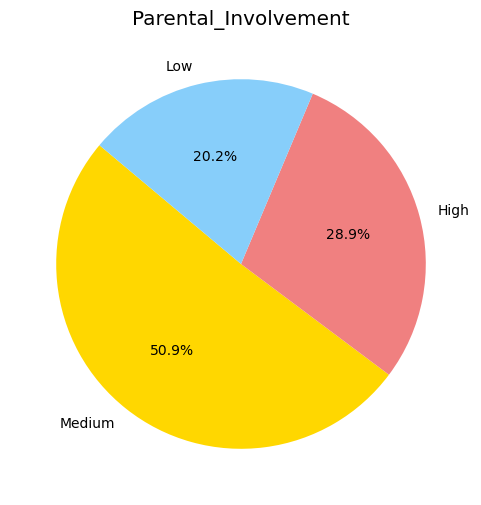

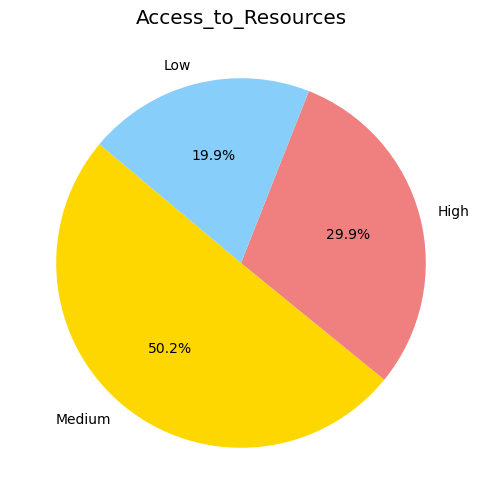

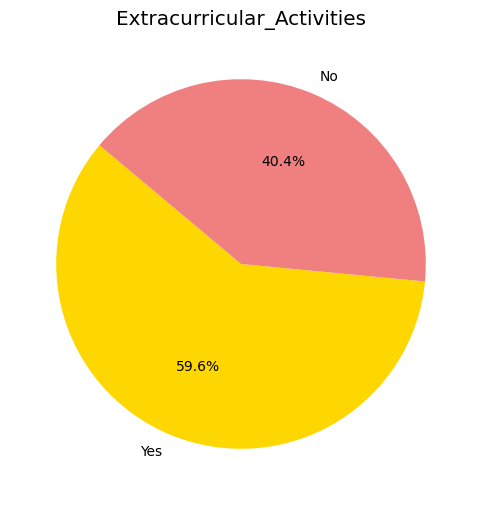

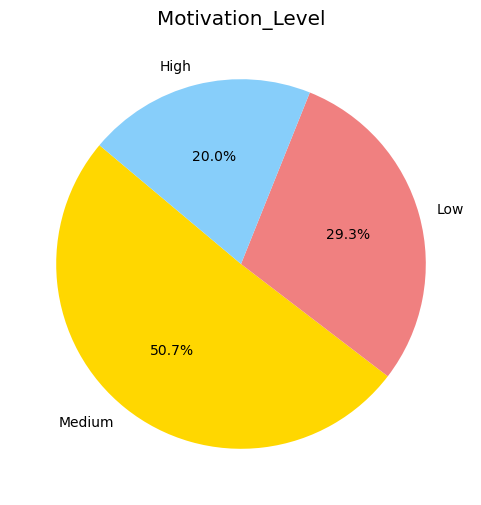

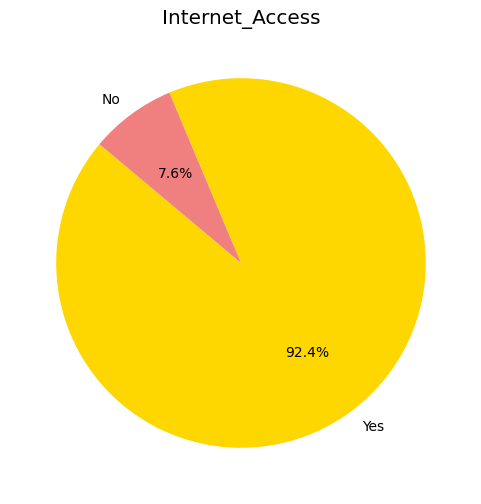

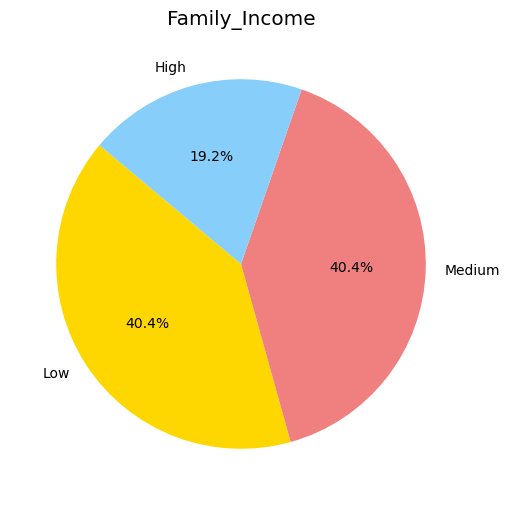

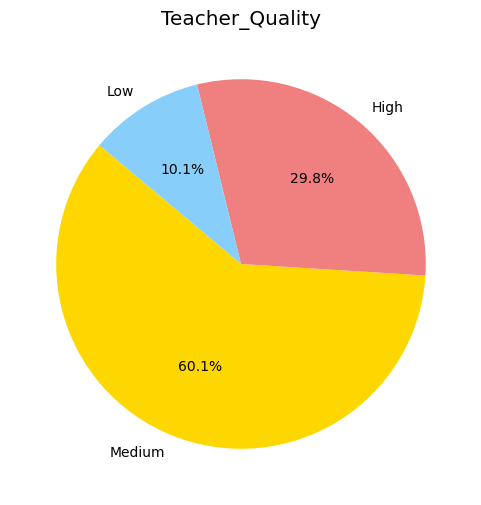

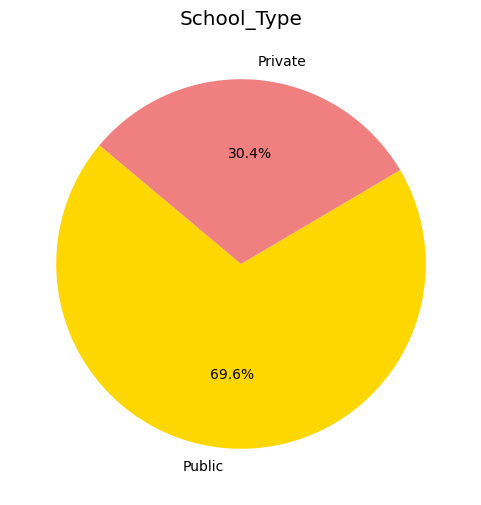

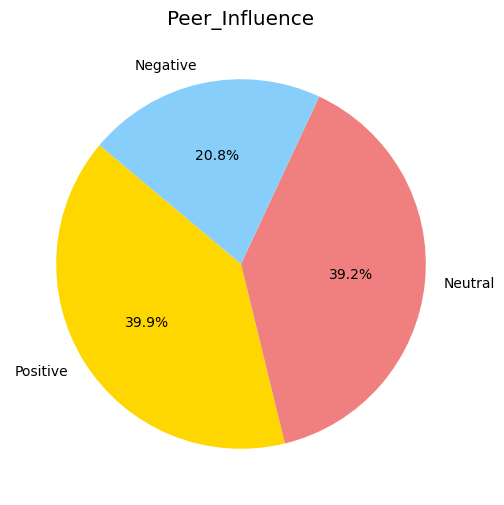

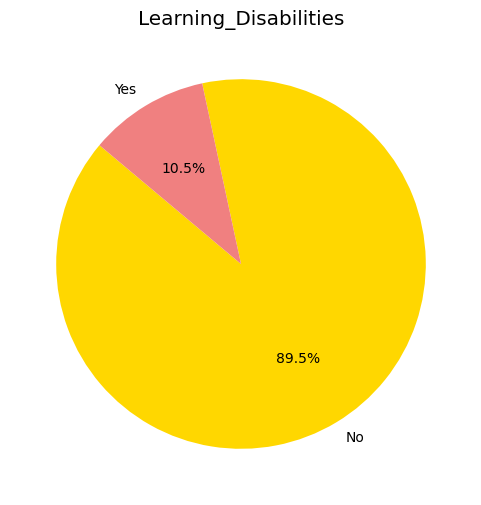

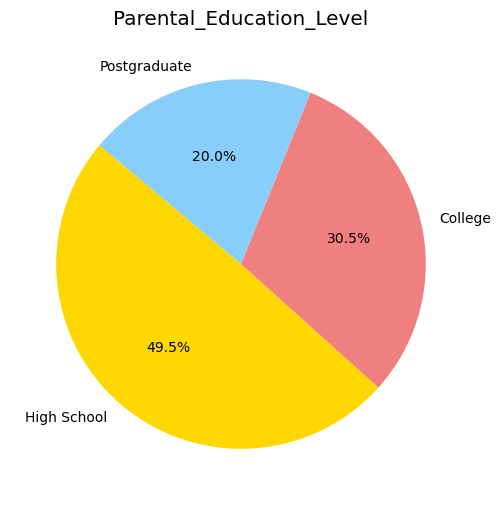

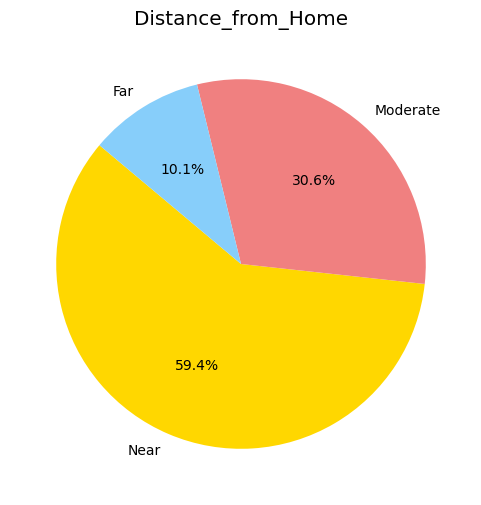

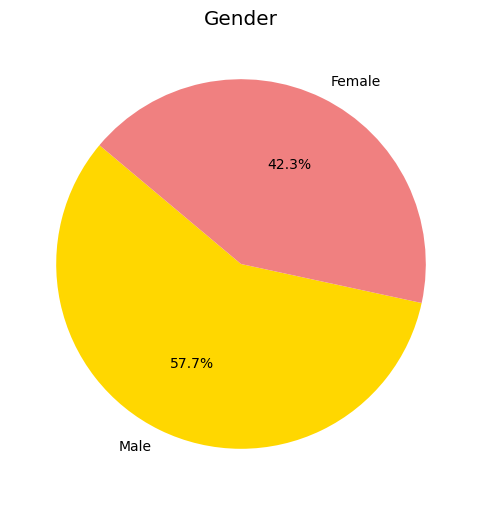

In [3]:
for column in df:
    if not np.issubdtype(df[column].dtype, np.number):
        counts = df[column].value_counts()

        plt.figure(figsize=(6,6))
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue'])
        plt.title(column)

## Boxplots

Boxplots show the three quartile values of the distribution along with extreme values.

The line inside the boxes are the median.

The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently.


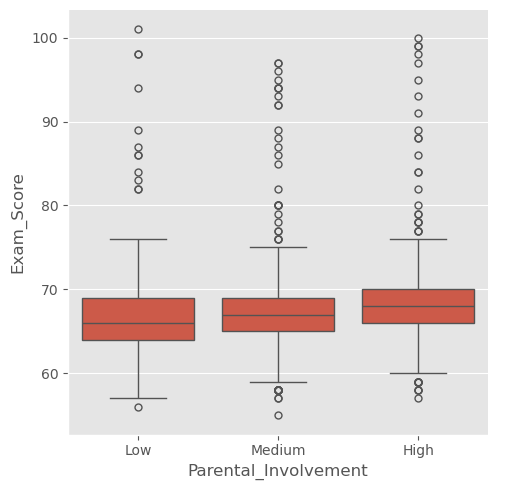

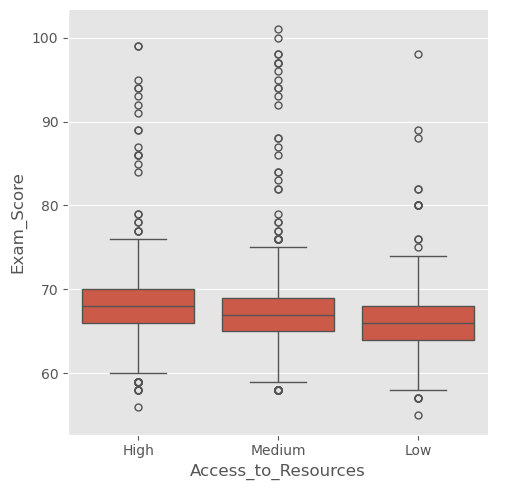

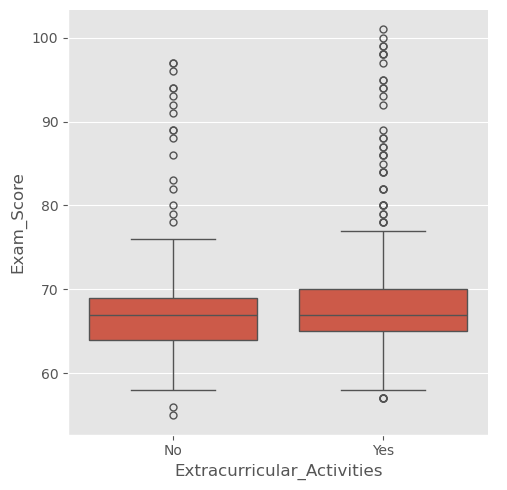

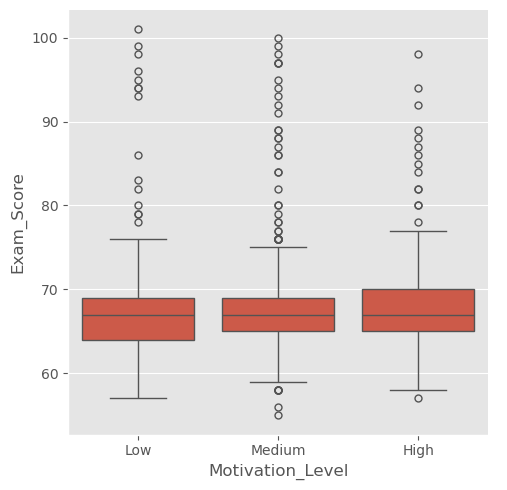

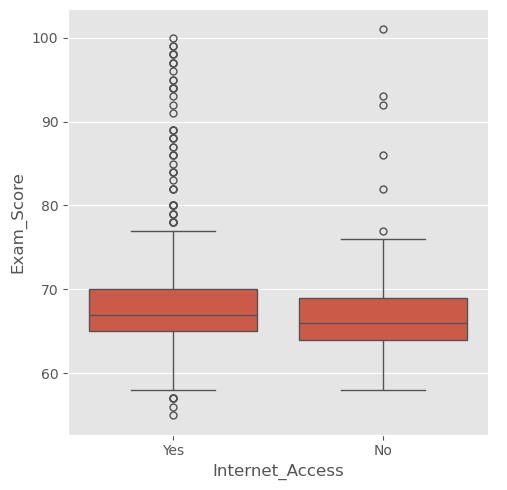

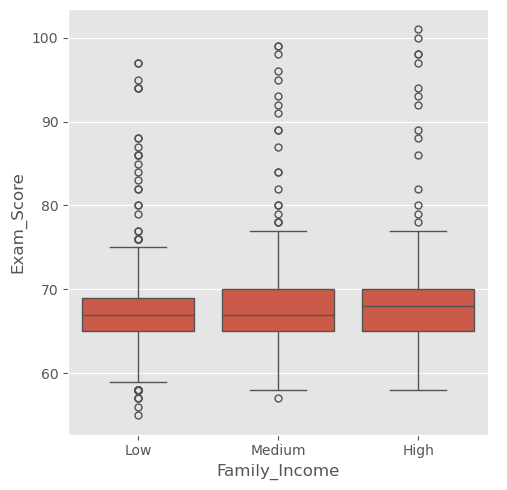

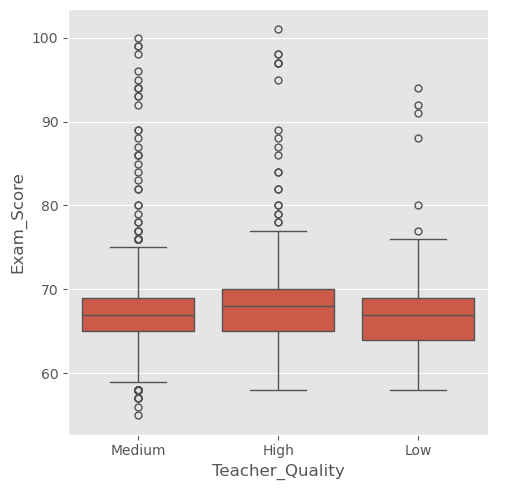

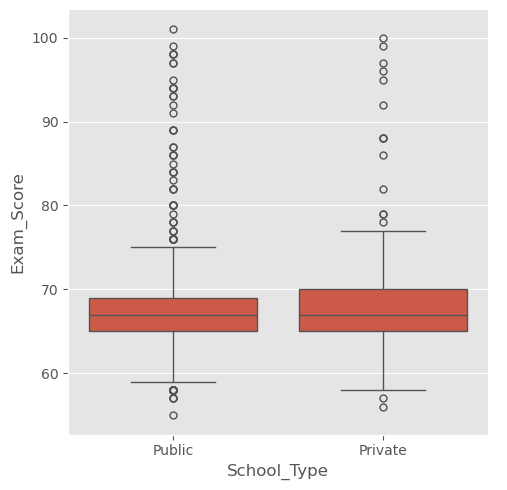

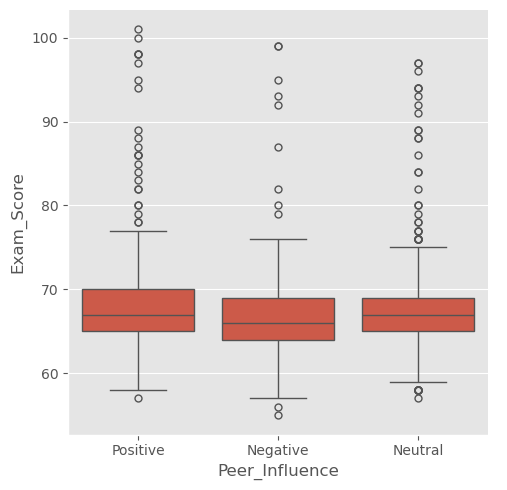

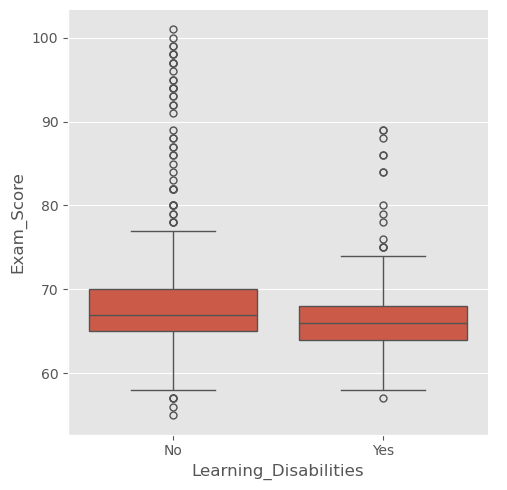

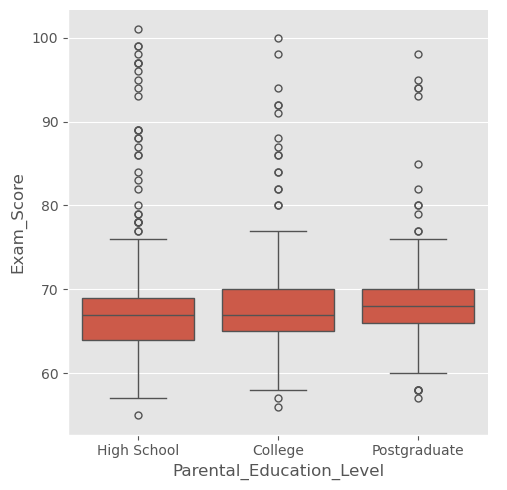

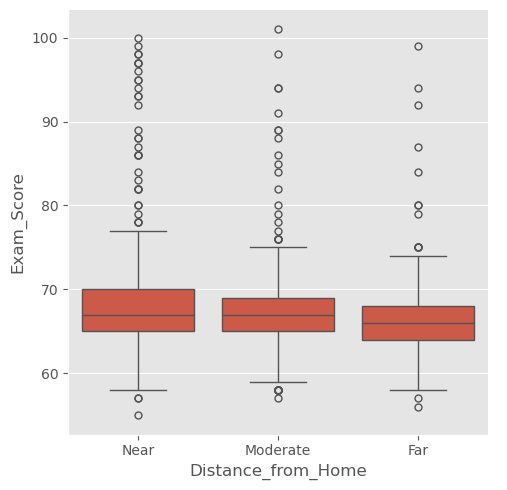

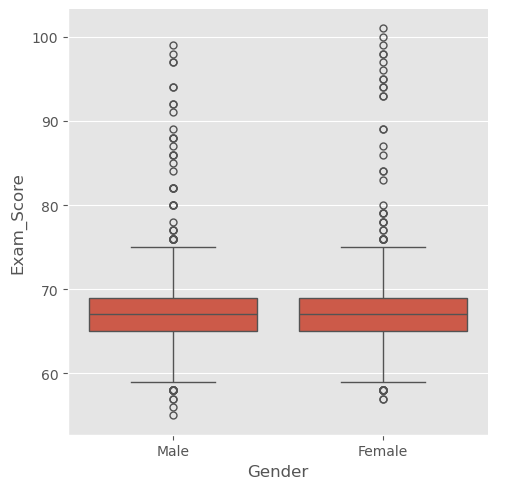

In [19]:
sc = 'Exam_Score'
for column in df:
        if not np.issubdtype(df[column].dtype, np.number):
            sns.catplot(
                    data=df,
                    x=column,
                    y='Exam_Score',
                    kind='box'
                )

## Violinplots

Similar to boxplots, violinplots show three quartile values and median.

However they also show the density of the data distribution.

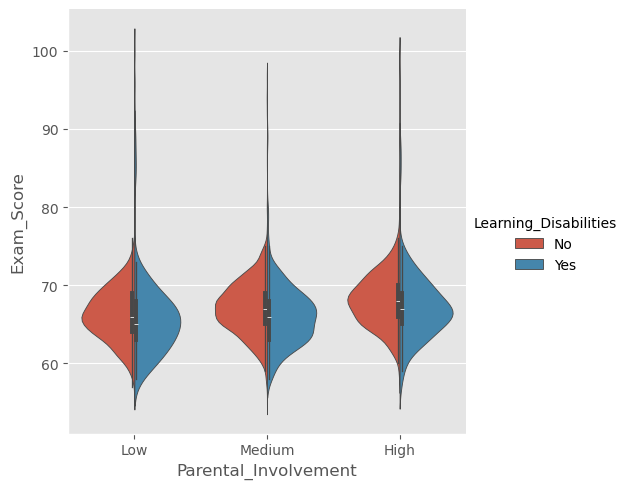

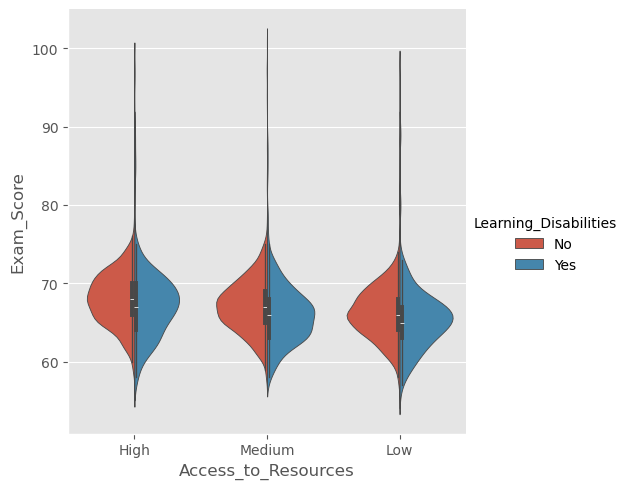

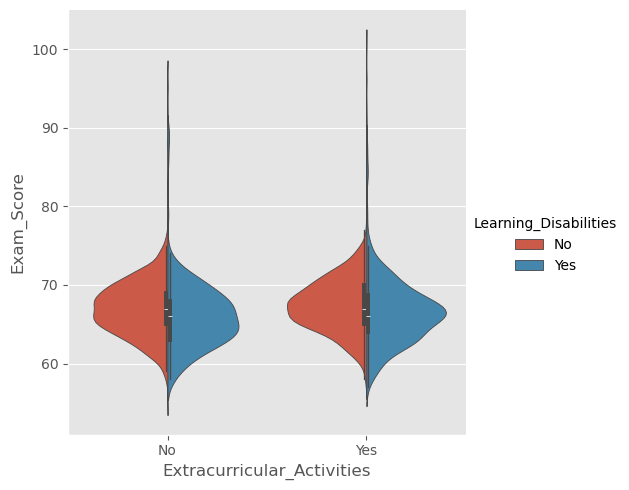

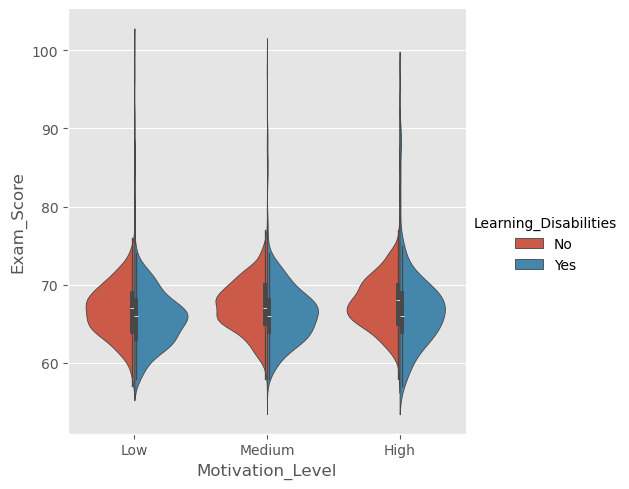

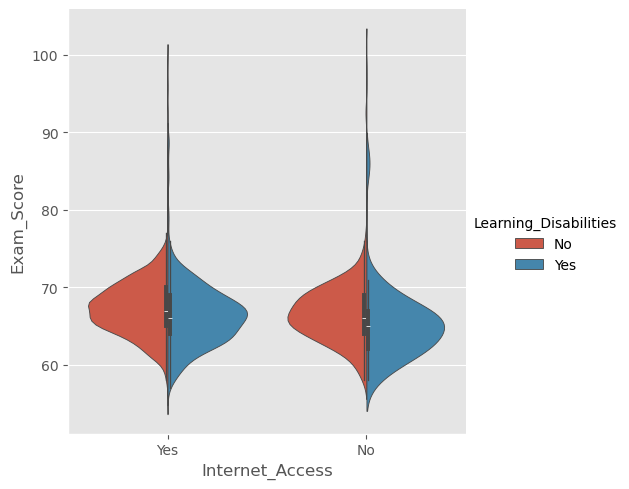

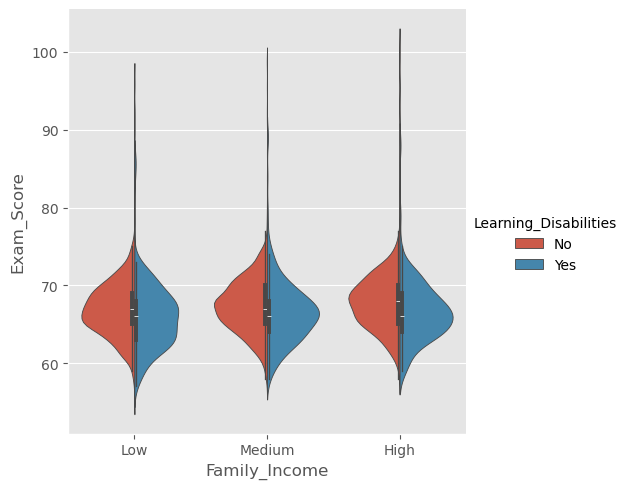

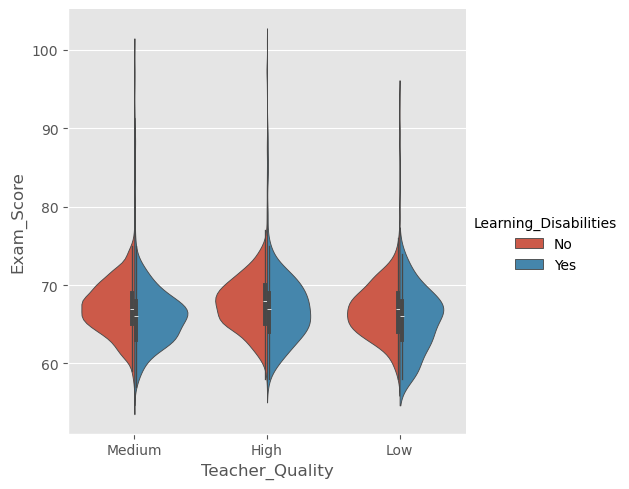

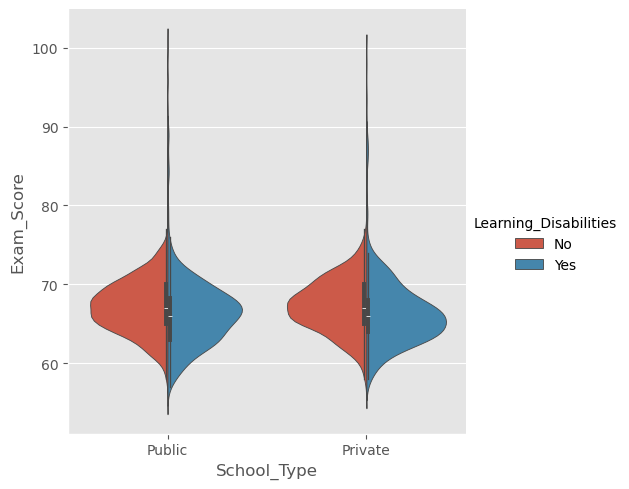

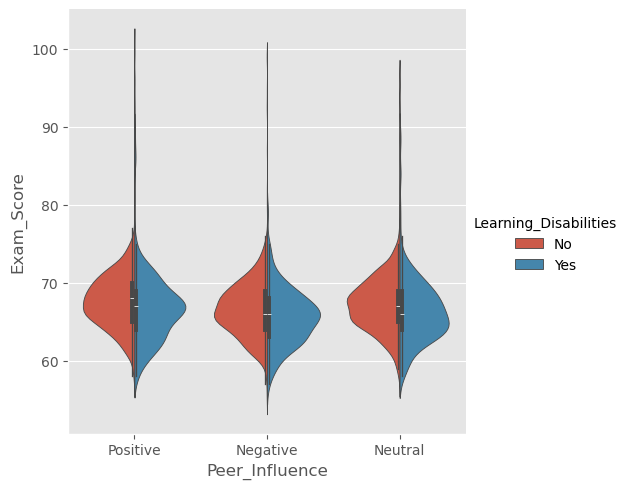

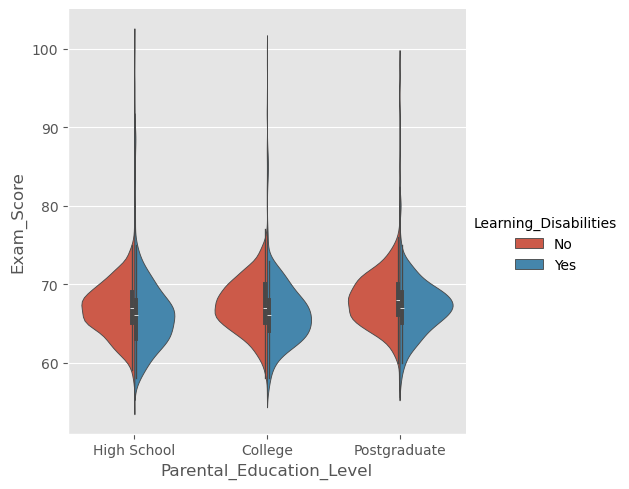

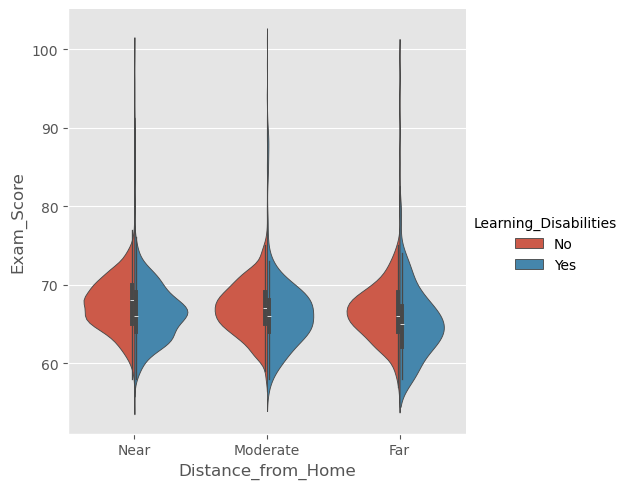

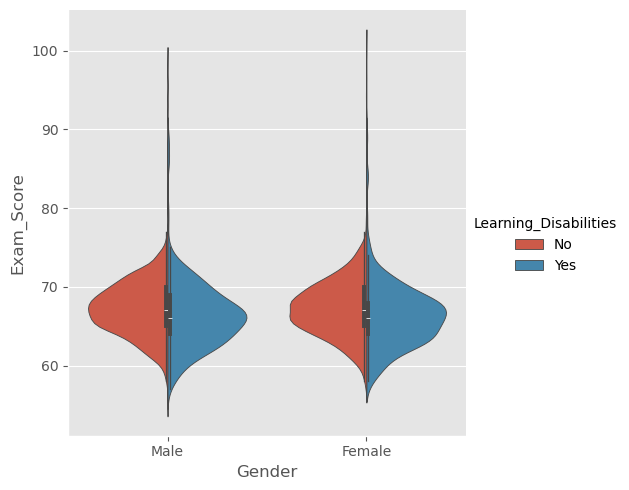

In [ ]:
for column in df:
        if not np.issubdtype(df[column].dtype, np.number) and column != 'Learning_Disabilities':
            sns.catplot(
                    data=df,
                    x=column,
                    y='Exam_Score',
                    hue='Learning_Disabilities',
                    kind='violin',
                    split=True
                )

## Error bars

They help visualize the uncertainty or variability in data.

I am using precentile interval error bars with the interval being 50.

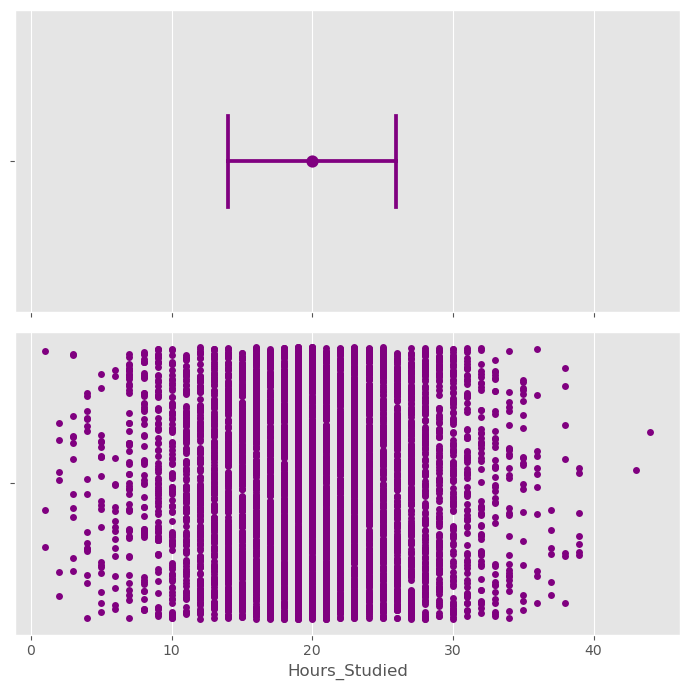

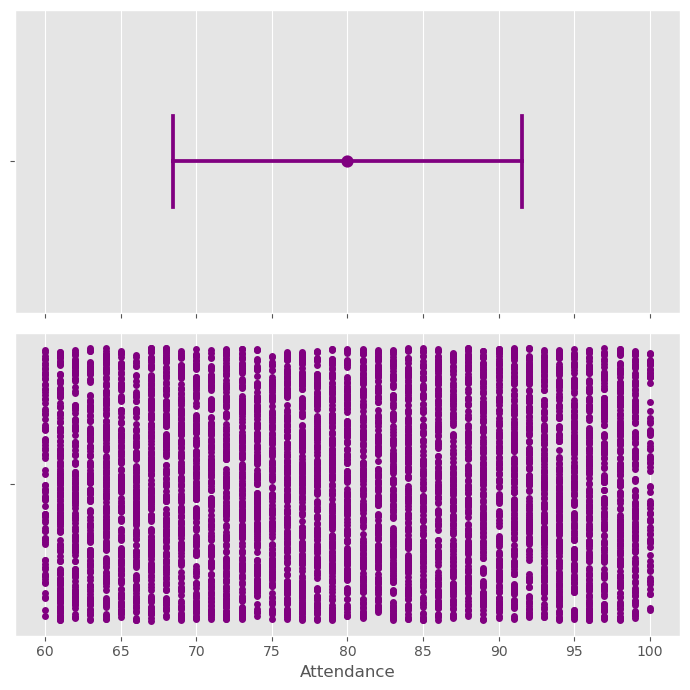

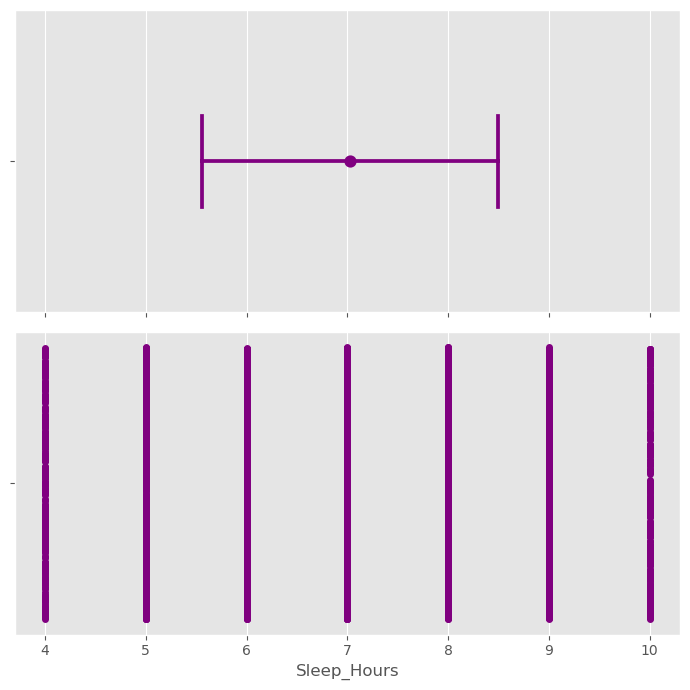

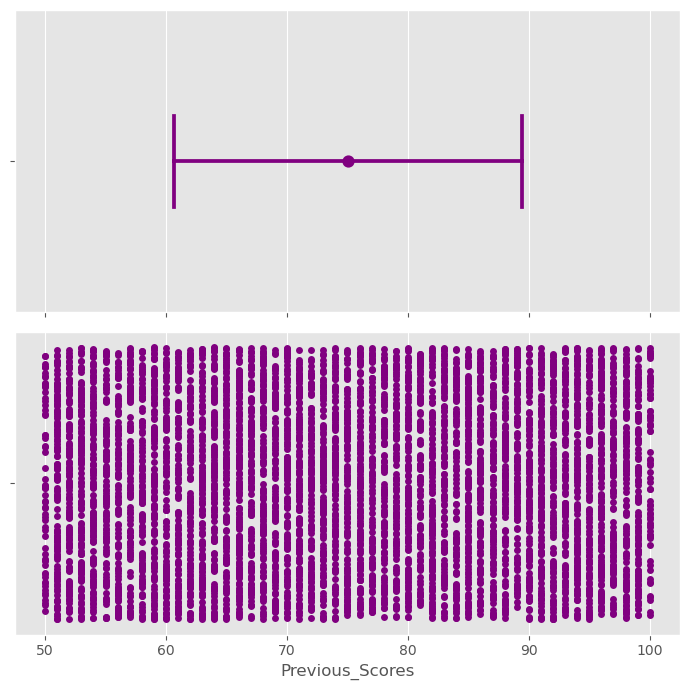

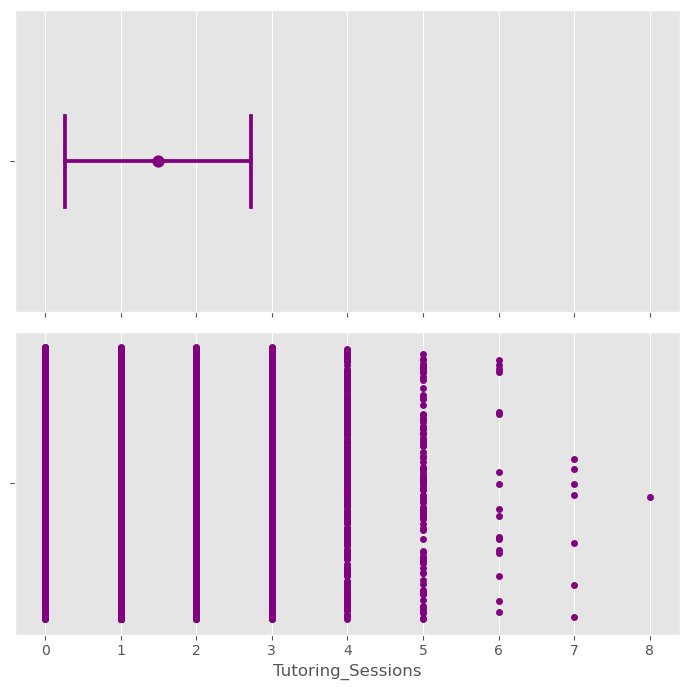

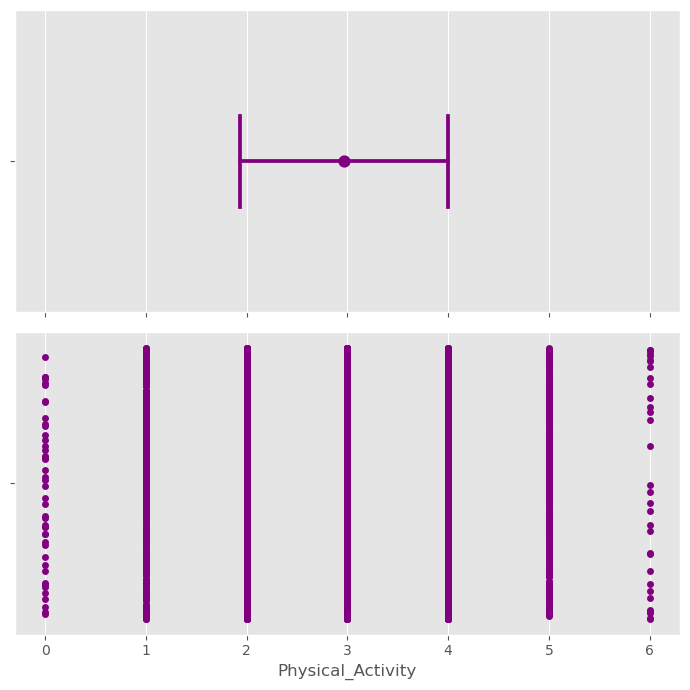

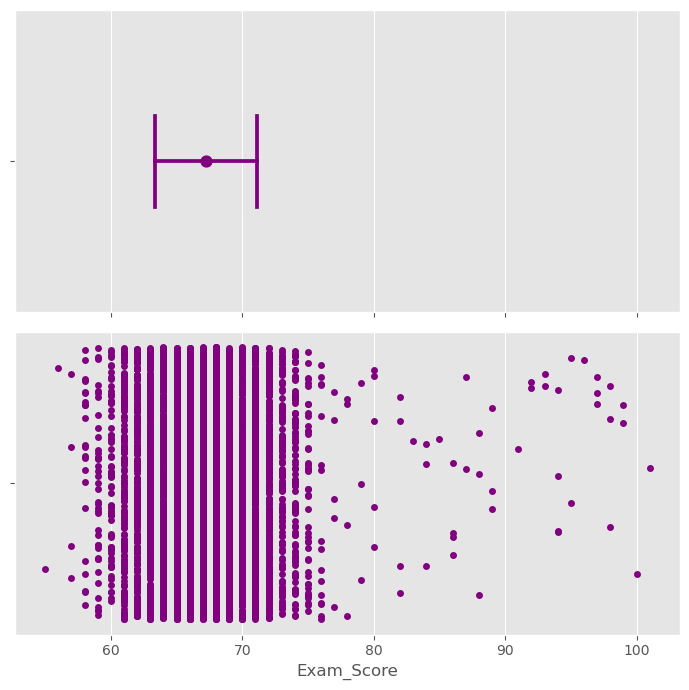

In [5]:
for column in df:
        if np.issubdtype(df[column].dtype, np.number):
            f, axs = plt.subplots(2, figsize=(7, 7), sharex=True, layout="tight")
            sns.pointplot(
                    x=df[column],
                    errorbar='sd',
                    capsize=.3,
                    ax=axs[0],
                    color='purple'
                )
            sns.stripplot(
                    x=df[column],
                    jitter=.45,
                    ax=axs[1],
                    color='purple'
                )

Here are relational plots with standard deviation error bars.

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets.

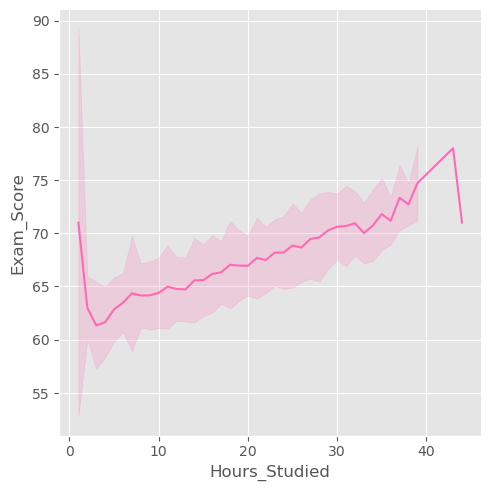

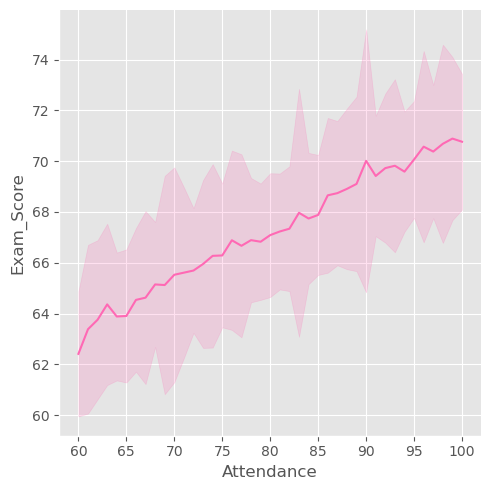

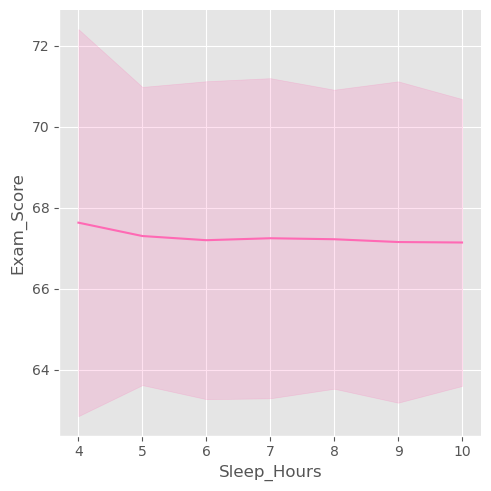

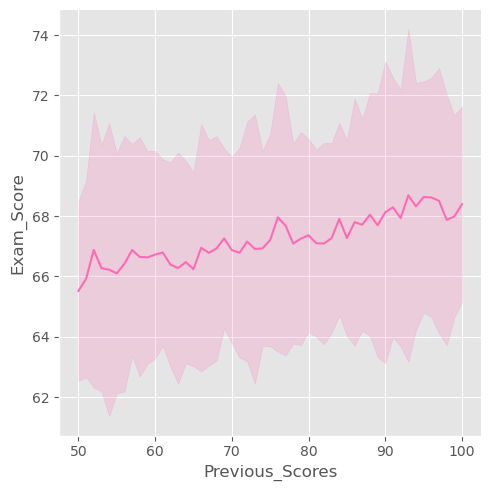

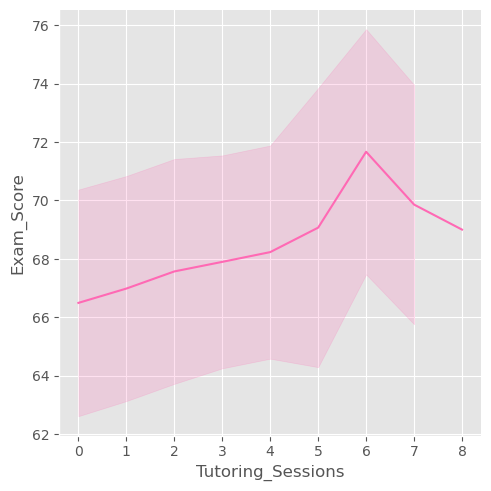

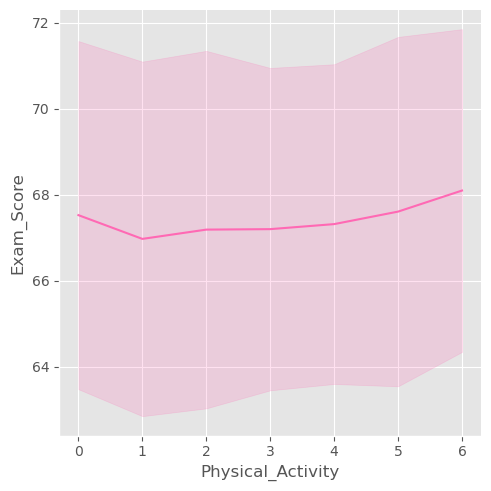

In [56]:
for column in df:
        if np.issubdtype(df[column].dtype, np.number) and column != sc:
            sns.relplot(
                data=df,
                kind='line',
                x=column,
                y=sc,
                errorbar="sd",
                color='hotpink'
            )

## Histograms

A histogram is a chart that plots the distribution of a numeric variable's values as a series of bars.

I am using a simple count histogram for each numeric feature.

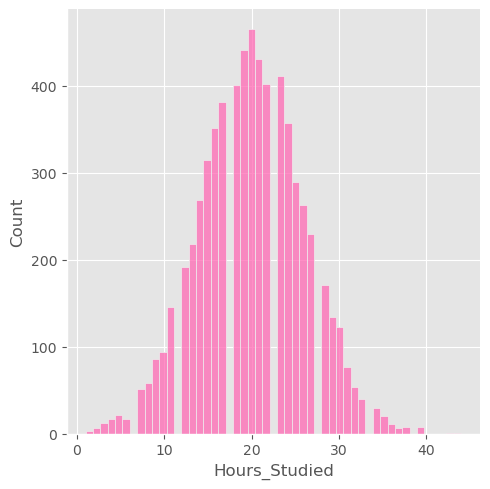

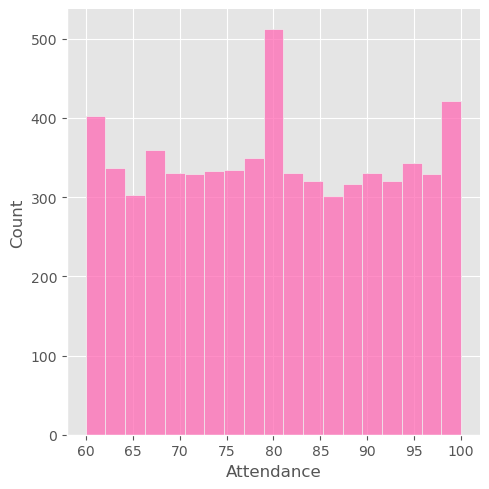

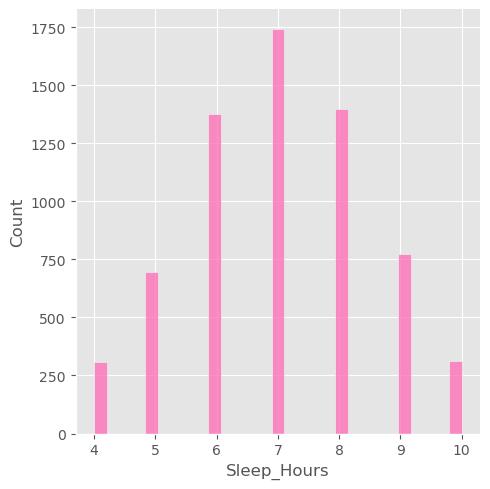

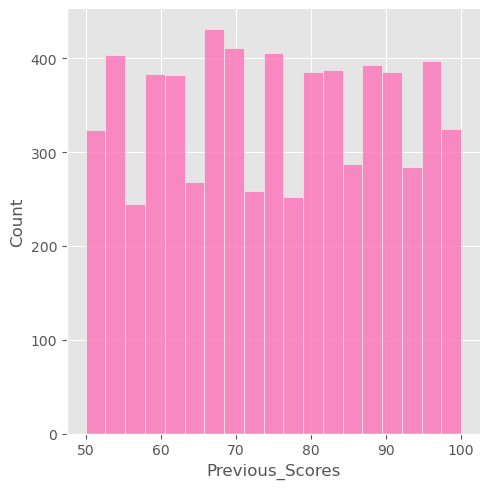

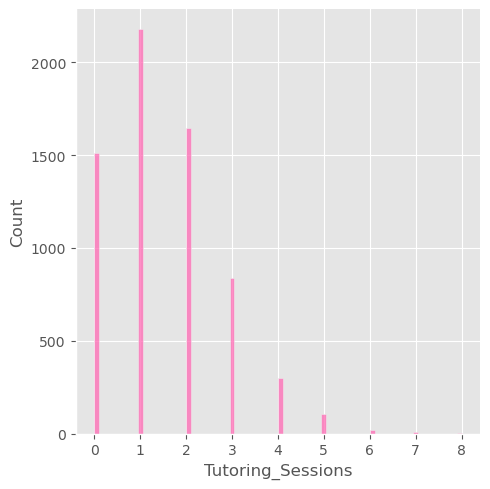

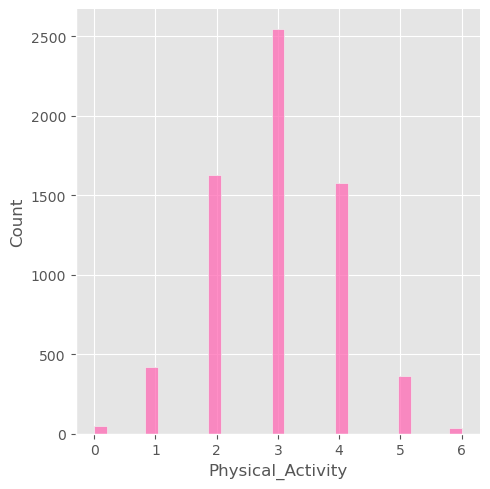

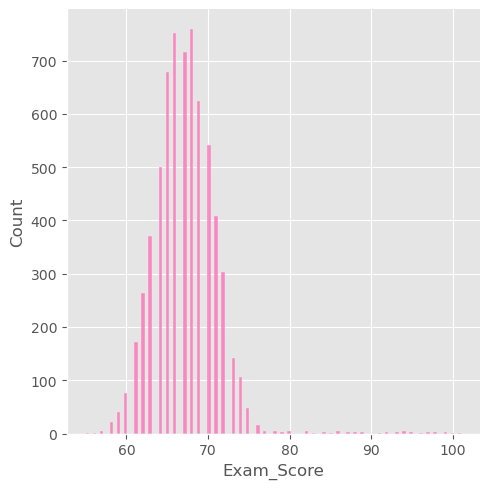

In [3]:
for column in df:
        if np.issubdtype(df[column].dtype, np.number):
            sns.displot(
                    data=df,
                    x=column,
                    color='hotpink'
                )

You can also use *hue* to separate values based on other variables.

I will be conditioning the histogram on Gender.

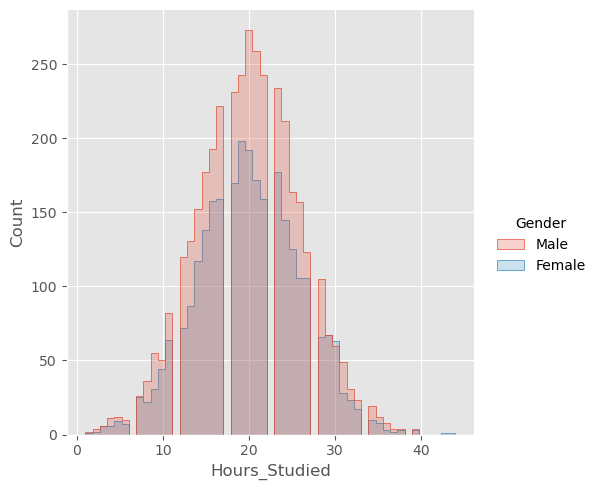

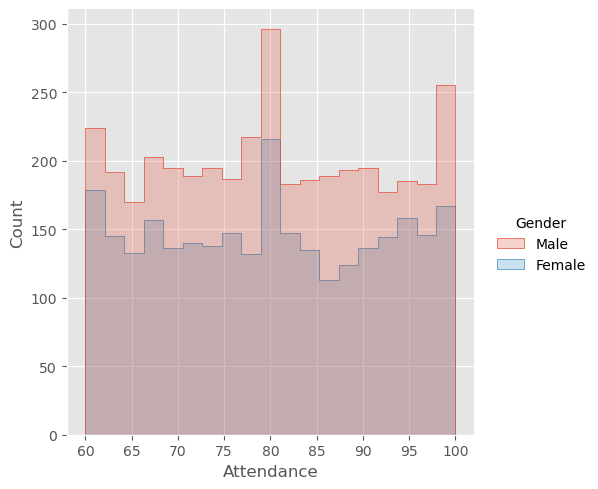

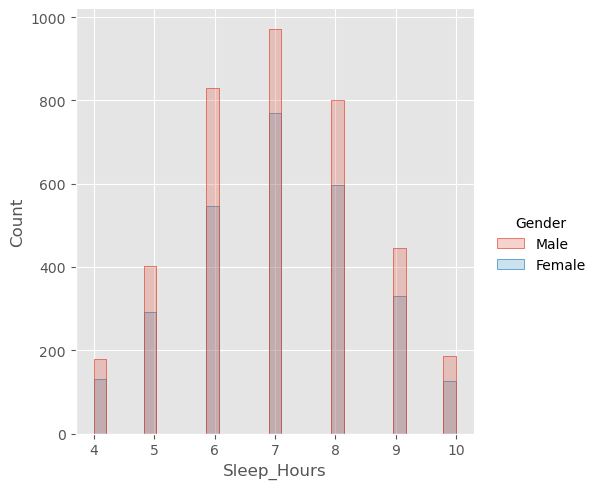

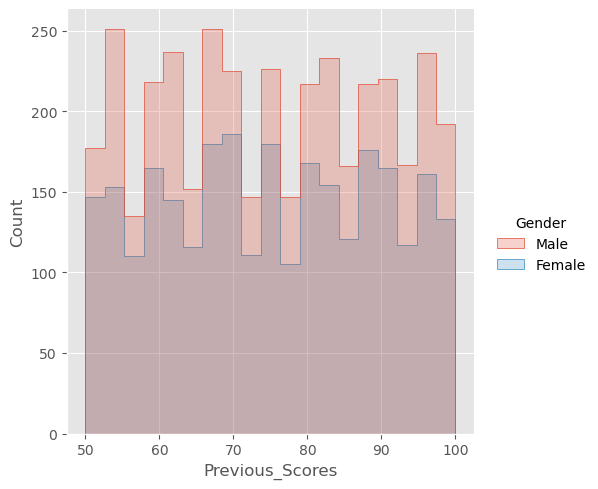

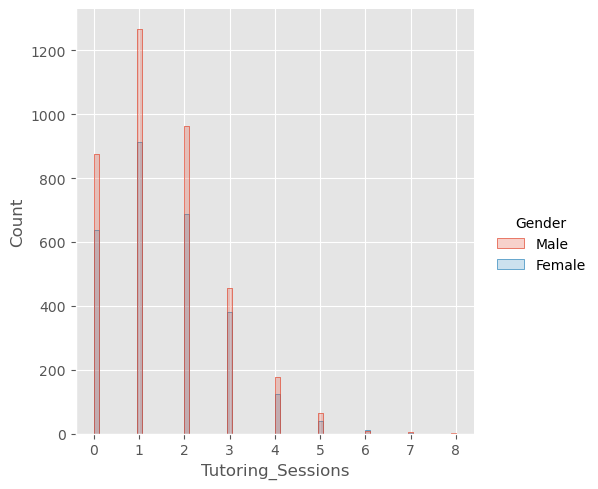

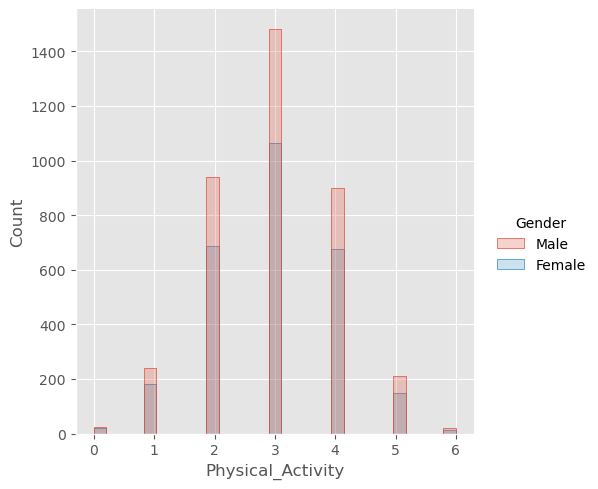

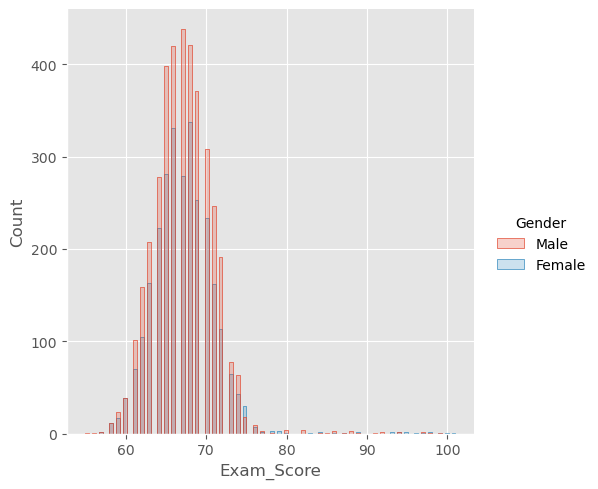

In [7]:
for column in df:
        if np.issubdtype(df[column].dtype, np.number) and column != 'Gender':
            sns.displot(
                    data=df,
                    x=column,
                    hue='Gender',
                    element='step'
                )

## Correlation heatmap

#### Correlation

Correlation is a statistical measure that expresses the extent to which two variables are linearly related.

The higher the correlation, the more linearly related two variables are.

Correlation can take values from -1 to 1:
- 1 -> both variables increase
- 0 -> there is no relation
- -1 -> when one variable increases, the other decreases

#### Heatmap

A heatmap depicts values for a main variable of interest across two axis variables as a grid of colored squares.

Text(0.5, 1.0, 'Correlation Heatmap\n')

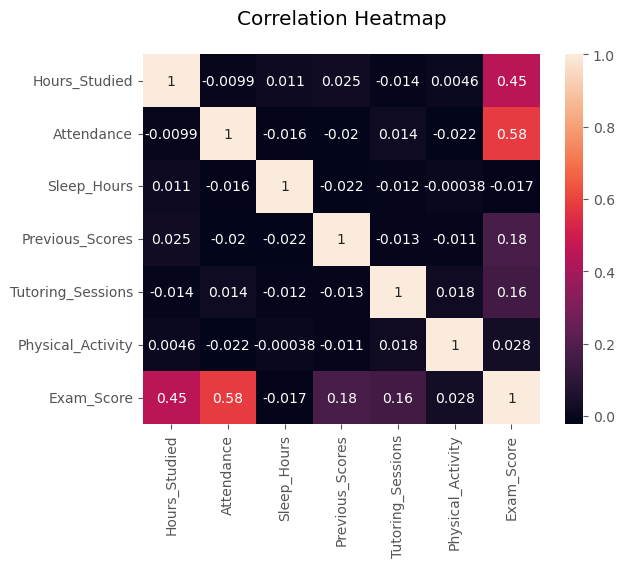

In [77]:
num_df = df.select_dtypes(include=['number'])
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap\n")